Her er jeres første rigtige opgave! I skal lave bruge [yfinance](https://mercantec.notion.site/yfinance-8f05decbf9a040659da38616e432ed62?pvs=4) også kaldet Yahoo Finance, til at trække data ned på jeres yndlingsaktie! I skal herfra lave en regressionsmodel på dataet. Det involvere at splitte dataet op i træningsdata og testdata. 
Nedenunder er der lige et code-snippet til at få jer startet!

Vi skal bruge følgende pakker til at starte vores projekt, en del af dem kender I. Pandas fra første dag, datetime har i nok arbejdet med lignende pakker før. [yfinance](https://mercantec.notion.site/yfinance-8f05decbf9a040659da38616e432ed62?pvs=4) er den som er linket til ovenfor og har alt det data vi skal bruge. Til sidste er der matplitlib, den er ikke strengt nødvendig for vores projekt, men det hjælper ofte at få et visuelt billede på! Dokumentation kan findes [her](https://mercantec.notion.site/MatPlotLib-bb10bec44c8e4bc28ac511017dbc895d?pvs=4)

In [32]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers

Vi bruger datetime pakken til at sætte et startspunkt og et slutpunkt. Startspunktet er for 365 dage siden og slutpunktet er for 2 dage siden!

In [33]:
Start = date.today() - timedelta(365)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

'2024-01-12'

Vi laver en funktion som tager en "ticker" ind, altså en aktie. 
Her bruger vi så Pandas, pd, til at en dataframe som indeholder vores data omkring den valgte ticker, med slut og startsdato som definere før.

In [34]:
def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End))     
    return Asset

Nu kan vi bruge vores funktion til at se på vores data. Her bruger vi Microsoft aktien, MSFT. Standarten er at vi for dato, åbningsprisen, højeste og laveste på dagen, lukke prisen og den justerede lukkepris. Vi kan så bruge matplotlib

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-10  227.759995  231.309998  227.330002  228.850006  226.838638   
2023-01-11  231.289993  235.949997  231.110001  235.770004  233.697830   
2023-01-12  235.259995  239.899994  233.559998  238.509995  236.413727   
2023-01-13  237.000000  239.369995  234.919998  239.229996  237.127396   
2023-01-17  237.970001  240.910004  237.089996  240.350006  238.237579   
...                ...         ...         ...         ...         ...   
2024-01-03  369.010010  373.260010  368.510010  370.600006  370.600006   
2024-01-04  370.670013  373.100006  367.170013  367.940002  367.940002   
2024-01-05  368.970001  372.059998  366.500000  367.750000  367.750000   
2024-01-08  369.299988  375.200012  369.010010  374.690002  374.690002   
2024-01-09  372.010010  375.989990  371.190002  375.790009  375.790009   

              Volume  
Date          

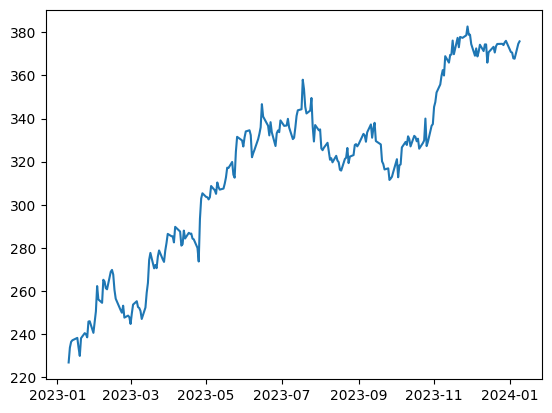

In [35]:
microsoft = closing_price('MSFT') 
print(microsoft)
plt.plot(microsoft['Adj Close'])
plt.show()

# Opgaven

Opgaven går nu på at I skal bruge jeres viden omkring regression på at lave en model som kan forudsige hvad aktie prisen bliver over den næste periode eller forhåbenligt bare en retning. 

Det er ikke målet at I skal finde en model som gør det, men at I skal lege rundt med det. De værktøjer som vi har fået indtil videre, er ikke nok til at kunne lave en model som har noget grundlag. Det data vi for er heller ikke nok. 

I kan tage inspiration ud fra dokumenterne her [regression](https://github.com/MAGS-Template/MachineLearning/blob/main/1.%20Regression/1.%20regression.ipynb) og [regression med data](https://github.com/MAGS-Template/MachineLearning/blob/main/1.%20Regression/2.%20regression_with_data.ipynb) - det er filerne i samme mappe som den her!


In [66]:
data = closing_price('MSFT') 

[*********************100%%**********************]  1 of 1 completed


In [37]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

In [38]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (np.average(trained_weight) * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

Epoch 1/4
17/17 [==============================] - 1s 4ms/step - loss: 464461.1250 - root_mean_squared_error: 681.5139
Epoch 2/4
17/17 [==============================] - 0s 4ms/step - loss: 285870.1875 - root_mean_squared_error: 534.6683
Epoch 3/4
17/17 [==============================] - 0s 4ms/step - loss: 170690.9531 - root_mean_squared_error: 413.1476
Epoch 4/4
17/17 [==============================] - 0s 4ms/step - loss: 89630.2656 - root_mean_squared_error: 299.3831


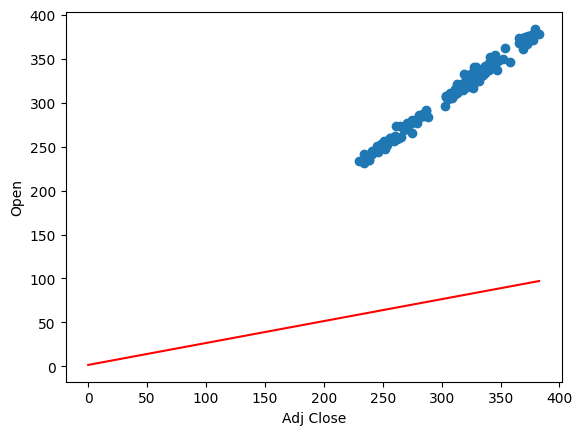

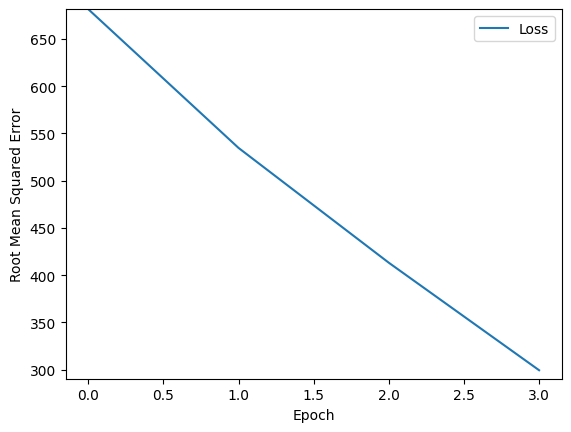

In [39]:
learning_rate = 0.025
epochs = 4
batch_size = 15

my_feature = "Adj Close"
my_label="Open"

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

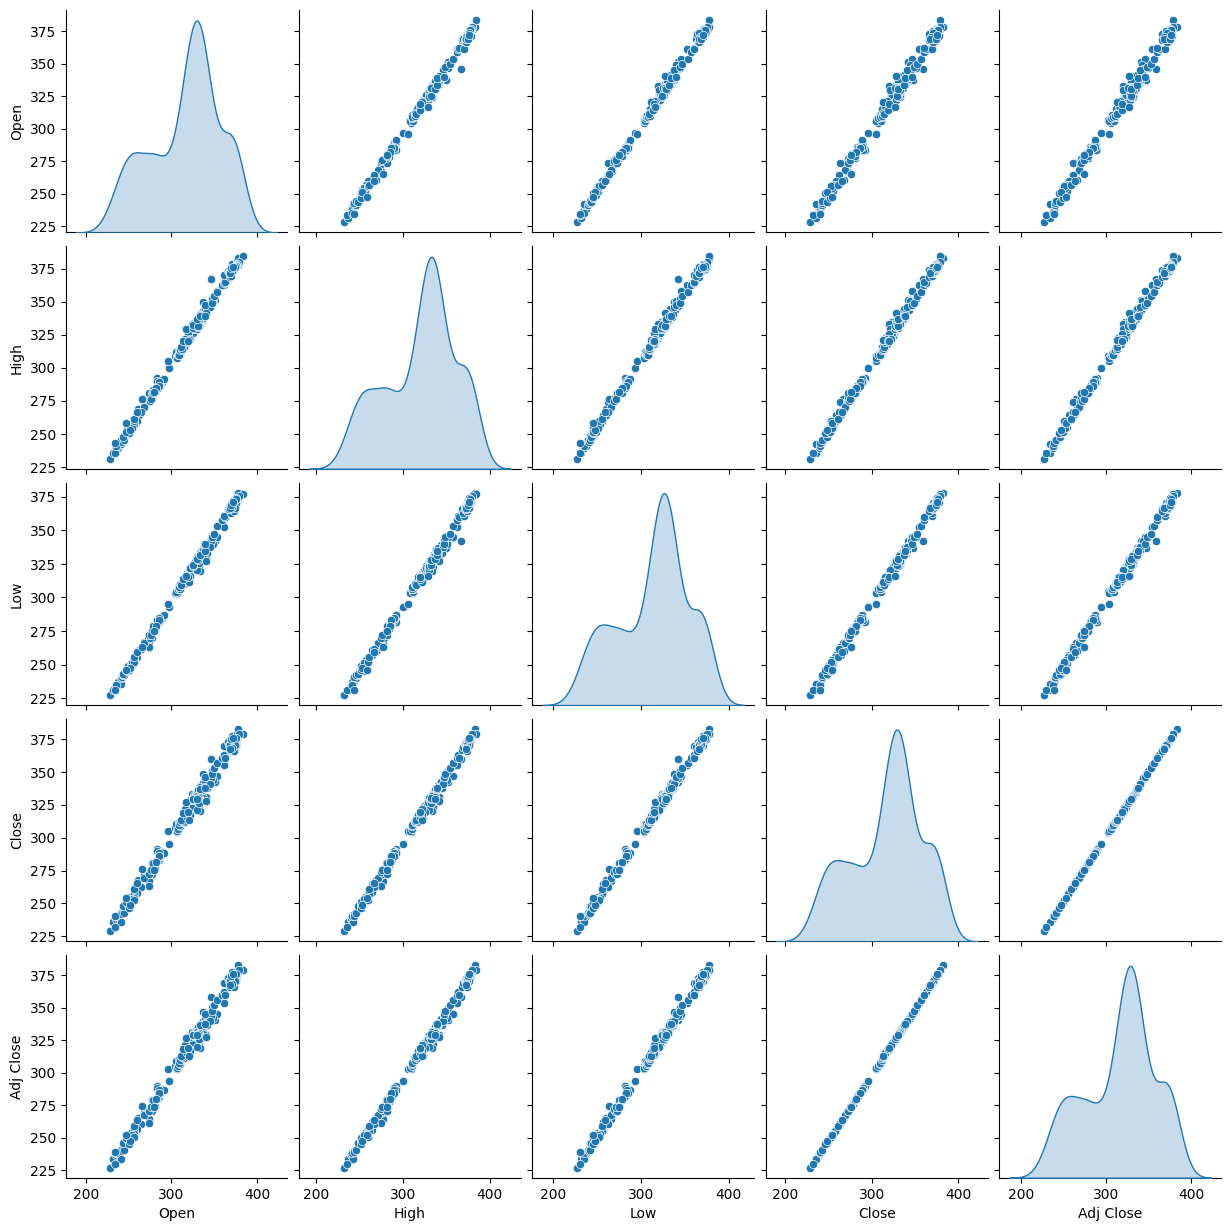

In [40]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Adj Close']], diag_kind='kde')

In [72]:
# Data
index = 'Open'
choosen_data = np.array(data[index])
train_features = data.copy()
train_labels = data.pop(index).astype('float32')

normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(choosen_data)

In [73]:
# Build model/ai
high_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [74]:
# optimiz model/ai
high_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [83]:
# Train model/ai
history = high_model.fit(
    train_features[index],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [76]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,218.156097,374.749756,95
96,217.249313,374.816956,96
97,216.347092,374.862274,97
98,215.478653,374.955261,98
99,214.566391,375.006805,99


In [77]:
def plot_loss(history): 
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([history.history.min, history.history.max])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

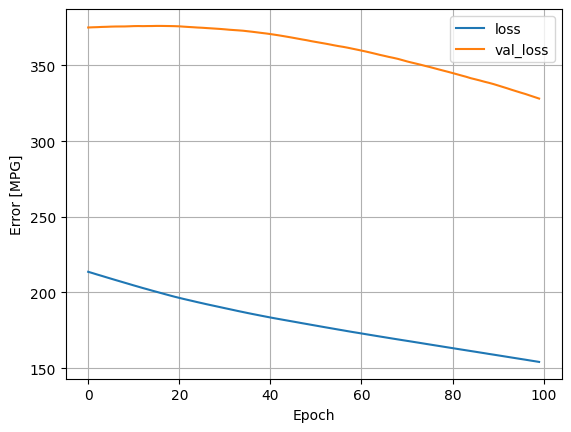

In [84]:
plot_loss(history)